<a href="https://colab.research.google.com/github/YADHUSUDHAN/AIL411-DEEP-LEARNING-LAB-KTU/blob/main/Time_series_forecasting_NIFTY_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error


**Loading and Scaling Dataset**

In [5]:
nifty_data = read_csv("/content/NIFTY .csv", index_col='Date', parse_dates=True)
sc = MinMaxScaler(feature_range=(0, 1))
nifty_data_scaled = sc.fit_transform(nifty_data)


<ipython-input-5-fa02b6655102>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  nifty_data = read_csv("/content/NIFTY .csv", index_col='Date', parse_dates=True)


In [4]:
nifty_data = read_csv("/content/NIFTY .csv", index_col='Date', parse_dates=True)
nifty_data

<ipython-input-4-2de03149b239>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  nifty_data = read_csv("/content/NIFTY .csv", index_col='Date', parse_dates=True)


,Open,High,Low,Turnover
Date,,,,
2009-02-03,43.1900,43.380,41.4400,43.1700
2009-03-03,43.1700,43.900,41.2000,43.8900
2009-04-03,43.8900,43.890,42.1600,42.5200
2009-05-03,42.5200,42.710,40.4100,41.4900
2009-06-03,41.4900,41.490,37.5700,38.1600
...,...,...,...,...
2020-04-05,33.9875,43.920,33.9875,43.6700
2020-05-05,43.6700,43.865,38.1475,43.6075
2020-06-05,43.6075,43.630,40.1975,41.2475


**Data Splitting and Plotting**

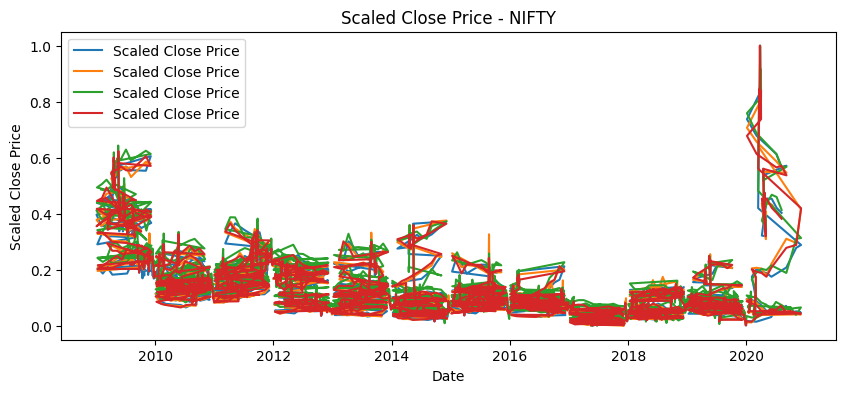

In [6]:
Train = nifty_data_scaled[:1006]
Test = nifty_data_scaled[1006:]

plt.figure(figsize=(10, 4))
plt.plot(nifty_data.index, nifty_data_scaled, label='Scaled Close Price')
plt.title('Scaled Close Price - NIFTY')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


**Time Series Generator**

In [8]:
n_input = 3
n_features = 4
generator = TimeseriesGenerator(Train, Train, length=n_input, batch_size=1)



In [15]:
Train

array([[0.44754647, 0.42956052, 0.4862573 , 0.4472731 ],
       [0.4472731 , 0.43641819, 0.4826868 , 0.45711454],
       [0.45711454, 0.43628631, 0.4969688 , 0.43838846],
       ...,
       [0.03953663, 0.04632224, 0.06493845, 0.05197512],
       [0.05197512, 0.06412581, 0.07356715, 0.06400355],
       [0.06400355, 0.07414856, 0.08829546, 0.07862903]])

In [14]:
generator[0]

(array([[[0.44754647, 0.42956052, 0.4862573 , 0.4472731 ],
         [0.4472731 , 0.43641819, 0.4826868 , 0.45711454],
         [0.45711454, 0.43628631, 0.4969688 , 0.43838846]]]),
 array([[0.43838846, 0.42072467, 0.47093391, 0.42430973]]))

**Model Definition and Compilation**

In [24]:
# Build and compile the model
modelGoogle = Sequential([
    SimpleRNN(units=100, input_shape=(n_input, n_features), activation='tanh'),
    Dense(units=1, activation='tanh')
])

modelGoogle.compile(loss='mean_squared_error', optimizer='adam')



**Model Training**

In [25]:
modelGoogle.fit(generator, epochs=5)

Epoch 1/5
1003/1003 [==============================] - 6s 4ms/step - loss: 0.0010
Epoch 2/5
1003/1003 [==============================] - 3s 3ms/step - loss: 4.8288e-04
Epoch 3/5
1003/1003 [==============================] - 4s 4ms/step - loss: 4.0538e-04
Epoch 4/5
1003/1003 [==============================] - 4s 4ms/step - loss: 4.1504e-04
Epoch 5/5
1003/1003 [==============================] - 3s 3ms/step - loss: 3.9980e-04


**Model Evaluation on Test Data**

In [26]:
test_generator = TimeseriesGenerator(Test, Test, length=n_input, batch_size=1)
test_loss = modelGoogle.evaluate(test_generator)
print(f'Test Loss: {test_loss}')


1760/1760 [==============================] - 8s 4ms/step - loss: 4.3565e-04
Test Loss: 0.0004356529680080712


**Prediction and Output**

In [33]:
X_test, y_test = test_generator[40]
prediction = modelGoogle.predict(X_test)
print(f"Actual: {y_test[0]}, Predicted: {prediction[0, 0]}")



1/1 [==============================] - 0s 37ms/step
Actual: [0.09735511 0.09472157 0.12712463 0.09926873], Predicted: 0.08738286793231964


In [29]:
X_test, y_test = test_generator[40]
prediction = modelGoogle.predict(np.reshape(X_test, (1, n_input, n_features)))
print(f"Actual: {y_test[0]}, Predicted: {prediction[0, 0]}")
print(f"Actual: {y_test[0]}, Predicted: {prediction[0, 1]}")
X_test, y_test = test_generator[41]
prediction = modelGoogle.predict(np.reshape(X_test, (1, n_input, n_features)))
print(f"Actual: {y_test[0]}, Predicted: {prediction[0, 0]}")
print(f"Actual: {y_test[0]}, Predicted: {prediction[0, 1]}")



1/1 [==============================] - 0s 38ms/step
Actual: [0.09735511 0.09472157 0.12712463 0.09926873], Predicted: 0.08738286793231964
Actual: [0.09735511 0.09472157 0.12712463 0.09926873], Predicted: 0.08596871048212051
1/1 [==============================] - 0s 40ms/step
Actual: [0.08942728 0.09775477 0.12251274 0.1015924 ], Predicted: 0.09330794960260391
Actual: [0.08942728 0.09775477 0.12251274 0.1015924 ], Predicted: 0.0908406525850296




```
Implement time series forecasting prediction for NIFTY-50 dataset.
a. Load appropriate dataset
b. Scale the dataset and convert into time series using TimeseriesGenerator
c. Implement SimpeRNN with activation function ‘tanh’, loss function ‘MSE’,
optimizer ‘Adam’
d. Fit the model and evaluate the model on the test data
e. Print the prediction at any time
```

